<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DSFB-Assignment-2" data-toc-modified-id="DSFB-Assignment-2-1">DSFB Assignment 2</a></span><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1.1">IMPORTS</a></span></li><li><span><a href="#Custom-Functions" data-toc-modified-id="Custom-Functions-1.2">Custom Functions</a></span></li></ul></li><li><span><a href="#PART-1:-EXPLORATORY-DATA-ANALYSIS" data-toc-modified-id="PART-1:-EXPLORATORY-DATA-ANALYSIS-2">PART 1: EXPLORATORY DATA ANALYSIS</a></span></li><li><span><a href="#Use-the-following-to-help-get-you-going..." data-toc-modified-id="Use-the-following-to-help-get-you-going...-3">Use the following to help get you going...</a></span></li><li><span><a href="#PART-2:-RANDOM-GUESSING-MODEL" data-toc-modified-id="PART-2:-RANDOM-GUESSING-MODEL-4">PART 2: RANDOM GUESSING MODEL</a></span></li><li><span><a href="#PART-3:-BASELINE-MODEL" data-toc-modified-id="PART-3:-BASELINE-MODEL-5">PART 3: BASELINE MODEL</a></span></li><li><span><a href="#PART-4:-LINEAR-PROBABILITY-MODEL" data-toc-modified-id="PART-4:-LINEAR-PROBABILITY-MODEL-6">PART 4: LINEAR PROBABILITY MODEL</a></span></li><li><span><a href="#PART-5:-LINEAR-PROBABILITY-MODEL-#2" data-toc-modified-id="PART-5:-LINEAR-PROBABILITY-MODEL-#2-7">PART 5: LINEAR PROBABILITY MODEL #2</a></span></li><li><span><a href="#PART-6:-OPTIMIZE-THE-LINEAR-PROBABILITY-MODEL" data-toc-modified-id="PART-6:-OPTIMIZE-THE-LINEAR-PROBABILITY-MODEL-8"><strong>PART 6</strong>: OPTIMIZE THE LINEAR PROBABILITY MODEL</a></span></li><li><span><a href="#PART-7:-LOGIT-MODEL" data-toc-modified-id="PART-7:-LOGIT-MODEL-9"><strong>PART 7</strong>: LOGIT MODEL</a></span></li></ul></div>

# DSFB Assignment 2

In this assignment, you will begin to work with data to build some basic models. 

In this part of the assignment you will try to predict the probability of defaulting on a credit card account at a Taiwanese bank. A credit card default happens when a customer fails to pay the minimum due on a credit card bill for more than 6 months. 

You will use a dataset from a Taiwanese bank with 30,000 observations (Source: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*). Each observation represents an account at the bank at the end of October 2005.  We renamed the variable default_payment_next_month to customer_default. The target variable to predict is `customer_default` -- i.e., whether the customer will default in the following month (1 = Yes or 0 = No). The dataset also includes 23 other explanatory features. 

Variables are defined as follows:

| Feature name     | Variable Type | Description 
|------------------|---------------|--------------------------------------------------------
| customer_default | Binary        | 1 = default in following month; 0 = no default 
| LIMIT_BAL        | Continuous    | Credit limit   
| SEX              | Categorical   | 1 = male; 2 = female
| EDUCATION        | Categorical   | 1 = graduate school; 2 = university; 3 = high school; 4 = others
| MARRIAGE         | Categorical   | 0 = unknown; 1 = married; 2 = single; 3 = others
| AGE              | Continuous    | Age in years  
| PAY1             | Categorical   | Repayment status in September, 2005 
| PAY2             | Categorical   | Repayment status in August, 2005 
| PAY3             | Categorical   | Repayment status in July, 2005 
| PAY4             | Categorical   | Repayment status in June, 2005 
| PAY5             | Categorical   | Repayment status in May, 2005 
| PAY6             | Categorical   | Repayment status in April, 2005 
| BILL_AMT1        | Continuous    | Balance in September, 2005  
| BILL_AMT2        | Continuous    | Balance in August, 2005  
| BILL_AMT3        | Continuous    | Balance in July, 2005  
| BILL_AMT4        | Continuous    | Balance in June, 2005 
| BILL_AMT5        | Continuous    | Balance in May, 2005  
| BILL_AMT6        | Continuous    | Balance in April, 2005  
| PAY_AMT1         | Continuous    | Amount paid in September, 2005
| PAY_AMT2         | Continuous    | Amount paid in August, 2005
| PAY_AMT3         | Continuous    | Amount paid in July, 2005
| PAY_AMT4         | Continuous    | Amount paid in June, 2005
| PAY_AMT5         | Continuous    | Amount paid in May, 2005
| PAY_AMT6         | Continuous    | Amount paid in April, 2005

The measurement scale for repayment status is:   

    -2 = payment two months in advance   
    -1 = payment one month in advance   
    0 = pay duly   
    1 = payment delay for one month   
    2 = payment delay for two months   
    3 = payment delay for three months   
    4 = payment delay for four months   
    5 = payment delay for five months   
    6 = payment delay for six months   
    7 = payment delay for seven months   
    8 = payment delay for eight months   
    9 = payment delay for nine months or more  

## IMPORTS

Here are a bunch of libraries that you may need to use...

In [1]:
# Standard imports
import numpy  as np
import pandas as pd
import pandas_profiling
import itertools
import random

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics import classification_report 

# Supporting functions from scikit-learn
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import roc_auc_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split


# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set a seed for replication
SEED = 1  # Use this anywhere a stochastic function allows you to set a seed

## Custom Functions

We are providing you these functions to make your life much easier. You can call these functions in order to plot a confusion matrix and/or a ROC curve. To use them, however, you will FIRST have to obtain the appropriate object by calling a scikit-learn function. We will give hints about that below...

In [2]:
def plot_confusion_matrix(cm, classes=[0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    """ 
    Function to plot a sklearn confusion matrix, showing number of cases per prediction condition. 
    The cm parameter can be an object created by the sklearn confusion_matrix() function.
    
    Args:
        cm         this must be a sklearn confusion matrix 
        classes    levels of the class being predicted; default to binary outcome
        normalize  apply normalization by setting `normalize=True`
        title      title for the plot
        cmap       color map
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round (cm[i, j],2), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [3]:
def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    """
    Function to plot an ROC curve in a consistent way.
    The fpr and tpr parameters can be created by the sklearn roc_curve() function.
    
    Args:
        fpr        False Positive Rate (list of multiple points)
        tpr        True Positive Rate (list of multiple points)
        title      Title above the plot
        note       Note to display in the bottom-right of the plot
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

# PART 1: EXPLORATORY DATA ANALYSIS

**PROBLEM**: Load the data into a pandas dataframe called `data`, then list out the columns.

In [4]:
# Load data
data = pd.read_csv("data/credit_data.csv")

In [5]:
# View columns
list(data.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'customer_default']

**PROBLEM**: Do some exploratory data analysis on the feature EDUCATION. Comment on what you observe. Can you use this variable with no modifications? Why or why not?

There are  7  values for feature Education
Values possible are:  [2 1 3 5 4 6 0]


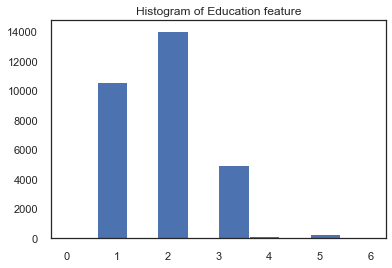

In [6]:
# Investigate 'education'
print("There are ", len(data['EDUCATION'].unique()), " values for feature Education")
print("Values possible are: ", data['EDUCATION'].unique())
plt.hist(data['EDUCATION'])
plt.title("Histogram of Education feature")
plt.show()

* ANSWER: We see the presence of undesirable values, the Education feature is supposed to take values in [1,2,3,4] only with the value 4 representing "others" so we should replace the ouliers, namely values [0,5,6] with the value 4

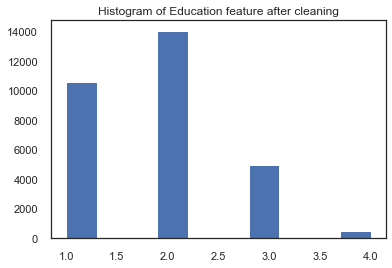

In [7]:
data['EDUCATION'] = [x if x in [1,2,3,4] else 4 for x in data['EDUCATION']]
plt.hist(data['EDUCATION'])
plt.title("Histogram of Education feature after cleaning")
plt.show()

**PROBLEM**: How many female customers defaulted in the dataset? 

In [8]:
females = data[data['SEX']==2] 
females_default = females[females['customer_default']==1]
print("Number of female customers defaulted: ",len(females_default))

Number of female customers defaulted:  3763


**PROBLEM**: Analyze the MARRIAGE variable by the target variable (customer_default), using the pandas crosstab() function (this will show totals by level of Marriage. For an excellent answer, also show overall total counts (ignoring customer_default) by level of Marriage.

In [9]:
pd.crosstab(data['customer_default'], data['MARRIAGE'], rownames=['customer_default'], colnames=['Marriage'], margins=True)

Marriage           0      1      2    3    All
customer_default                              
0                 49  10453  12623  239  23364
1                  5   3206   3341   84   6636
All               54  13659  15964  323  30000

**PROBLEM**: What is the data type of all features in this dataframe (as imported by Pandas)?

In [10]:
# Check data types
data.dtypes

ID                  int64
LIMIT_BAL           int64
SEX                 int64
EDUCATION           int64
MARRIAGE            int64
AGE                 int64
PAY_1               int64
PAY_2               int64
PAY_3               int64
PAY_4               int64
PAY_5               int64
PAY_6               int64
BILL_AMT1           int64
BILL_AMT2           int64
BILL_AMT3           int64
BILL_AMT4           int64
BILL_AMT5           int64
BILL_AMT6           int64
PAY_AMT1            int64
PAY_AMT2            int64
PAY_AMT3            int64
PAY_AMT4            int64
PAY_AMT5            int64
PAY_AMT6            int64
customer_default    int64
dtype: object

ANSWER: The data type is Integer for all the features

**PROBLEM**: Plot a "boxplot" of the variable LIMIT_BAL.

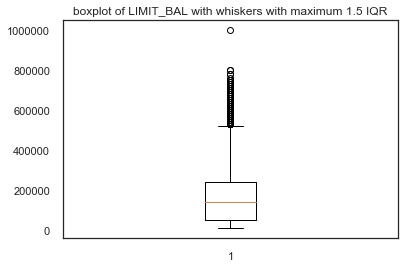

In [11]:
# Check distribution of the Credit Limit using box plot
plt.title('boxplot of LIMIT_BAL with whiskers with maximum 1.5 IQR')
plt.boxplot(data['LIMIT_BAL'])
plt.show()

**PROBLEM**: What is the minimum value of LIMIT_BAL?

In [12]:
print("Minimum value of LIMIT_BAL is: ", min(data['LIMIT_BAL']))

Minimum value of LIMIT_BAL is:  10000


**PROBLEM**: Install the python package "pandas_profiling" and run an automated "profile_report" on your dataset. HINT: We did not import it for you... you'll need to install and import it yourself

In [13]:
data.profile_report(style={'full_width':True})

**PROBLEM**: One-hot-encode SEX and MARRIAGE

In [14]:
data = pd.get_dummies(data, columns=['SEX','MARRIAGE'])

**PROBLEM**: Run some code to prove that SEX and MARRIAGE are now one-hot-encoded and are now binary indicators (also called dummy variables).

In [15]:
data.head()

ID  LIMIT_BAL  EDUCATION  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0   1      20000          2   24      2      2     -1     -1     -2     -2   
1   2     120000          2   26     -1      2      0      0      0      2   
2   3      90000          2   34      0      0      0      0      0      0   
3   4      50000          2   37      0      0      0      0      0      0   
4   5      50000          2   57     -1      0     -1      0      0      0   

   ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  customer_default  SEX_1  SEX_2  \
0  ...         0         0         0                 1      0      1   
1  ...      1000         0      2000                 1      0      1   
2  ...      1000      1000      5000                 0      0      1   
3  ...      1100      1069      1000                 0      0      1   
4  ...      9000       689       679                 0      1      0   

   MARRIAGE_0  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0           0           1           0           0  
1           0           0           1           0  
2           0           0           1           0  
3           0           1           0           0  
4           0           1           0           0  

[5 rows x 29 columns]

In [16]:
data.SEX_1.unique()

array([0, 1], dtype=uint64)

In [17]:
data.MARRIAGE_2.unique()

array([0, 1], dtype=uint64)

# Use the following to help get you going... 

The following code assumes that you have already loaded your data into a pandas dataframe named `data`. It selects data for the target variable into an array (`y`) and the features into a new dataframe called (`X`).  

In [18]:
# Select target
y = np.array(data['customer_default'])

# Select features 
features = list(set(list(data.columns)) - set(['customer_default']))
X = data.loc[:, features]

We will start with a simple testing procedure where we split the data into two subsets: one for "training" and one for "testing." Use the `sklearn` function `train_test_split()`  to split your data. 

In [19]:
# Divide data into a training set and a testing set using the train_test_split() function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

You should now start to use the subset datasets of: `X_train` ,  `X_test` , `y_train` , `y_test`

# PART 2: RANDOM GUESSING MODEL

To start, let's run a truly "dumb" model that makes a random guess each time.

**PROBLEM**: Predict the outcome by guessing.

In [20]:
# Predict a guess  (store into a variable starting with the name `y_hat`...)
y_hat = [random.randint(0,1) for x in range(0,len(y))]

**PROBLEM**: Tabulate the predicted values so we can see what it predicted. There are many different ways to do this - pick one that works for you.

In [21]:
# Tabulate value counts by level of the predicted variable 
ones = sum(y_hat)
print("Number of 1s : ", ones)
print("Number of 0s : ", len(y)-ones)

Number of 1s :  14996
Number of 0s :  15004


**PROBLEM**: What is the Standard Deviation of the prediction? Does that make sense? Explain why.

In [22]:
# What is the Standard Deviation of the prediction?
np.std(y_hat)

0.499999982222222

ANSWER: Yes it makes sense because the standard deviation represents the Mean distance of the data points to their mean value which in this case is 0.5

**PROBLEM**: Calculate and plot a confusion matrix.

HINT: Use the custom function `confusion_matrix()` defined at the top of the notebook.

array([[11699, 11665],
       [ 3305,  3331]])

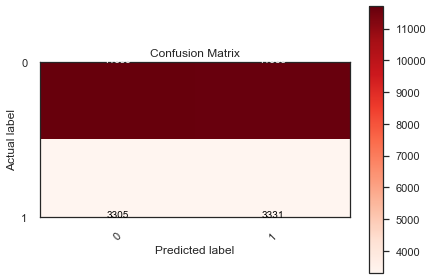

In [23]:
# Calculate a confusion matrix
cm = confusion_matrix(y, y_hat)
plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)
cm

**PROBLEM**: How many errors did the dumb baseline model make?

In [24]:
# How many errors did the baseline model make?
print("Number of FP+FN = ", cm[0][1]+cm[1][0])

Number of FP+FN =  14970


**PROBLEM**: Calculate the accuracy. Does it make sense? Why or why not? Is this a good measure? why or why not?

In [25]:
# Calculate accuracy
print("Accuracy = ", (cm[0][0]+cm[1][1])/len(y) )

Accuracy =  0.501


ANSWER: 
* The computed accuracy makes sense because we use a random model, meaning the probability that we get a prediction right is 0.5 in expectation. 

# PART 3: BASELINE MODEL

Now let's start our analysis of viable prediction models with a very simple (but dumb) baseline model that always predicts the most frequent outcome. The results of this model will give you sense of how well more complex model perform relative to a baseline model.

**PROBLEM**: Find most frequent outcome  

In [26]:
# Calculate the most frequent outcome (do it with code!)
ones_freq = sum(y_train)/len(y_train)
zeros_freq = 1-ones_freq
most_freq = 1 if ones_freq>=0.5 else 0
freq = ones_freq if ones_freq>=0.5 else zeros_freq
print('Most frequent outcome is: ', most_freq, "and has frequency equal to: ",freq )

Most frequent outcome is:  0 and has frequency equal to:  0.7787916666666667


**PROBLEM**: Predict the most frequent outcome (store into a variable starting with the name `y_hat`...). Then tabulate it to check you did it right. There are many different ways to tabulate - pick one that works for you.

In [27]:
# Predict the most frequent outcome into a variable called y_hat and then tabulate it to check. 
y_hat = [0 for x in range(len(y_test))]

**PROBLEM**: What is the Standard Deviation of the prediction? Does that make sense? Explain why.

In [28]:
# What is the Standard Deviation of the prediction?
np.std(y_hat)

0.0

ANSWER: The result makes sense because our model predict a constant value equal to zero so the standard deviation should be null

**PROBLEM**: Calculate and plot a confusion matrix.

array([[4673,    0],
       [1327,    0]])

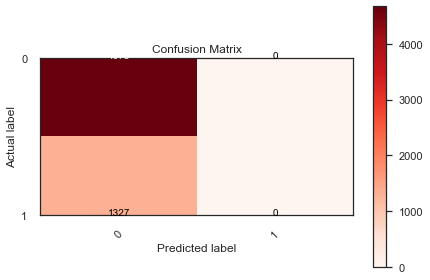

In [29]:
# Calculate a confusion matrix
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)
cm

In [30]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



**PROBLEM**: How many errors did the dumb baseline model make?

In [31]:
# How many errors did the baseline model make?
print("Number of FP+FN = ", cm[0][1]+cm[1][0])

Number of FP+FN =  1327


**PROBLEM**: Calculate the accuracy. Does it make sense? Why or why not? Is this a good measure? why or why not?

In [32]:
# Calculate accuracy
print("Acuuracy = ", (cm[0][0]+cm[1][1])/len(y_test) )

Acuuracy =  0.7788333333333334


ANSWER: 
* Yes the computed accuracy makes sense. Our model should perform better than the random prediction. It makes sense to have an accuracy which is more or less equal to the frequency of the most frequent element.
* This is not a good measure because in a way our model overfits the test_set, if our dataset was balanced then we would have done as good as the random model (0.5 accuracy)

# PART 4: LINEAR PROBABILITY MODEL

Repeat the analysis using a linear (OLS) probability model. You can start with the code below -- it shows you how to define, fit, and predict a model from sklearn.

In [33]:
# Fit an OLS linear regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_hat_ols_prob = ols_model.predict(X_test)  # Precict the probability

**PROBLEM**: Plot the predicted probabilities (sorted low to high). Do they look reasonable? Why or why not?

Max =  1.291467767173473    Min =  -0.24828269699452385


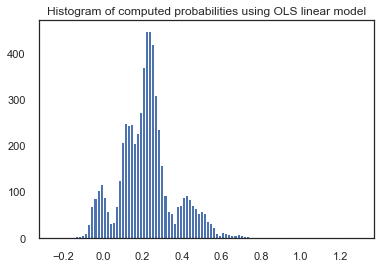

In [34]:
print("Max = ", max(y_hat_ols_prob), "   Min = ", min(y_hat_ols_prob))
plt.hist(y_hat_ols_prob, bins=100)
plt.title("Histogram of computed probabilities using OLS linear model")
plt.show()

ANSWER: The probabilities obtained using OLS linear model are not reasonable because they should be restrained to [0,1] interval.

**PROBLEM**: The linear probability model predicts a probability for every observation. Now take a probability threshold of 0.30 and predict a case to be "Positive" when the probability >= 0.30 

In [35]:
# Predict positive case at 0.30 probability threshold
y_hat_ols_prob_binary=[1 if y_hat_ols_prob[x]>=0.3 else 0 for x in range(0,len(y_hat_ols_prob))]

**PROBLEM**: Plot a confusion matrix.

array([[4136,  537],
       [ 685,  642]])

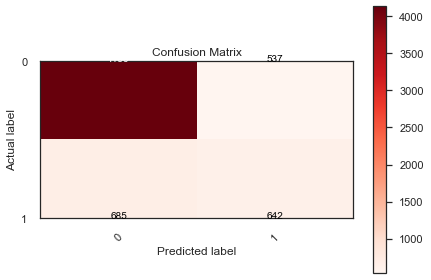

In [36]:
# Plot confusion matrix for that prediction
cm = confusion_matrix(y_test, y_hat_ols_prob_binary)
plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)
cm

In [37]:
print(classification_report(y_test, y_hat_ols_prob_binary))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.54      0.48      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



**PROBLEM**: How many errors did the OLS make?

In [38]:
# How many errors did the OLS make?
print("Number of FP+FN = ", cm[0][1]+cm[1][0])

Number of FP+FN =  1222


**PROBLEM**: Calculate the accuracy. Is this model significantly more accurate than the baseline model? Comment on the importance of this difference.

In [39]:
# Calculate accuracy
print("Acuuracy = ", (cm[0][0]+cm[1][1])/len(y_test) )

Acuuracy =  0.7963333333333333


ANSWER: 
* The OLS linear model is slightly more accurate than the baseline model. Though the difference in accuracy is not huge, the improvement of the OLS model is that it has less false negatives and more true negatives

**PROBLEM**: Use the `roc_auc_score()` function from sklearn to calculate the AUC score. What does this number tell you?

In [40]:
# Calculate AUC
roc_auc_score(y_test, y_hat_ols_prob)

0.7160658215330868

ANSWER: 
* The higher the AUC value, the better our model is at distinguishing between the two classes independently from the threshhold value.

# PART 5: LINEAR PROBABILITY MODEL #2

Repeat the prediction with the SAME linear (OLS) probability model estimated above -- but now change to a probability threshold of 0.60 (i.e. predict Positive Case when prob >= 0.60). 

**PROBLEM**: Manually calculate how many errors this linear probability model with a threshold of 0.60 makes. (i.e., do the calculation in pure python - do NOT use sklearn).

In [41]:
# Using the SAME linear probability model that we fit earlier
# Make a prediction of positive cases at 0.60 probability threshold
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_hat_ols_prob = ols_model.predict(X_test)  # Precict the probability
y_hat_ols_prob_binary=[1 if y_hat_ols_prob[x]>=0.6 else 0 for x in range(0,len(y_hat_ols_prob))]

**PROBLEM**: Manually calculate how many errors this model makes. (i.e., do the calculation in pure python - do NOT use sklearn).

In [42]:
# Without using sklearn, calculate how many errors this model makes
print("Number of FP+FN = ", sum(abs(y_hat_ols_prob_binary-y_test)))

Number of FP+FN =  1289


**PROBLEM**: Calculate how many errors this model makes, but now extract the errors from values returned by the sklearn confusion matrix function.

Number of FP+FN =  1289


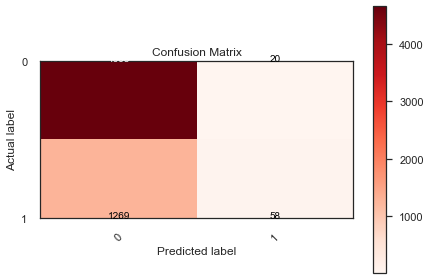

In [43]:
# Now USE the sklearn confusion matrix function to calculate how many errors this model makes
# Plot confusion matrix for that prediction
cm = confusion_matrix(y_test, y_hat_ols_prob_binary)
plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)
print("Number of FP+FN = ", cm[0][1]+cm[1][0])

**PROBLEM**: Calculate accuracy. Does it make sense? Why or why not? Is this a good measure? why or why not?

In [44]:
# Calculate accuracy
print("Accuracy = ", (cm[0][0]+cm[1][1])/len(y_test) )

Accuracy =  0.7851666666666667


ANSWER:
* The accuracy does not say much about the TPR and FPR which we can analyze using the ROC Curve.
* The accuracy is a way to measure how well our model model is doing at the specified threshold.

**PROBLEM**: Did the accuracy go up or down by raising the probability threshold? Would that always happen when moving from a probability threshold of 0.3 to 0.6 (yes/no)? Why?

ANSWER: The accuracy goes a bit down in our case, but that is not always the case and we can not imply any conclusions.

**PROBLEM**: Finally, plot the ROC curve for the linear probability model. HINT: use the `plot_roc()` custom function defined at the start of the notebook.

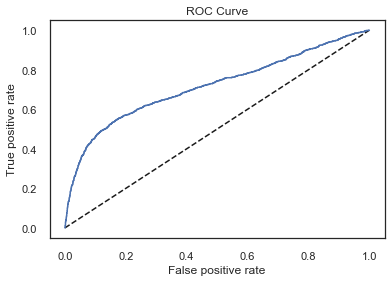

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_ols_prob)
plot_roc(fpr, tpr)

**PROBLEM**: What is the AUC for this model?

In [46]:
roc_auc_score(y_test, y_hat_ols_prob)

0.7160658215330868

**PROBLEM**: Does the linear probabily model outperform the baseline?

ANSWER: 
* Yes the linear probability model outperforms the baseline model. If we were to represent the ROC curve for the linear model it would be the dashed black line. We clearly see the AUC for that curve would be equal to 0.5

# **PART 6**: OPTIMIZE THE LINEAR PROBABILITY MODEL

**PROBLEM**: Find and report the optimal probability threshold for the linear probability model, when maximizing for accuracy.

In [47]:
accuracy_scores = []
for thresh in thresholds:
    accuracy_scores.append(accuracy_score(y_test, 
                                         [1 if m > thresh else 0 for m in y_hat_ols_prob]))

accuracies = np.array(accuracy_scores)
max_accuracy_threshold =  thresholds[accuracies.argmax()]
max_accuracy_threshold

0.40086423814738714

**PROBLEM**: Plot the accuracy across probability thresholds; plot a vertical line for your optimal threshold.

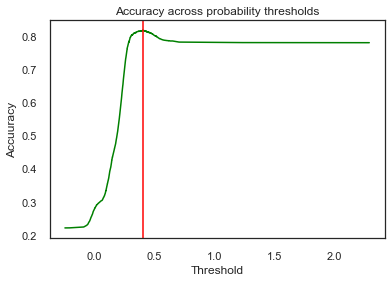

In [48]:
plt.plot(thresholds,accuracies, color='green')
plt.axvline(x=max_accuracy_threshold, color='red')
plt.xlabel("Threshold")
plt.ylabel("Accuuracy")
plt.title("Accuracy across probability thresholds")
plt.show()

**PROBLEM**: Now cosider a case where all errors are not valued equally; instead, a false negative is four times as costly as a false positive. Find and report the optimal probability threshold for the linear probability model given these weights.

In [49]:
# When we change the weights associated to False Positives, the accuracy accross different threshold just get rescaled
# So we should plot the sum of errors against different threshold
errors = []
FP = []
FN = []
for thresh in thresholds:
    y_hat_ols_prob_binary=[1 if y_hat_ols_prob[x]>=thresh else 0 for x in range(0,len(y_hat_ols_prob))]
    weighted_errors = y_test - y_hat_ols_prob_binary
    FP.append(sum([1 if x<0 else 0 for x in weighted_errors]))
    FN.append(sum([1 if x>0 else 0 for x in weighted_errors]))
    # We rescale the False Negatives to have 4*times more weights than False Positives
errors = (np.array(FN)*4)+FP

errors = np.array(errors)
best_threshold = thresholds[errors.argmin()]
best_threshold

0.2717699985212046

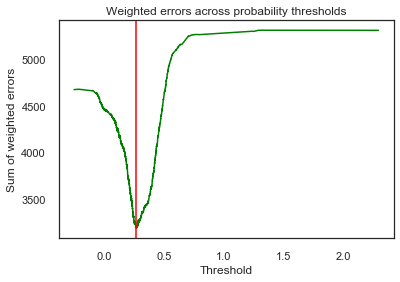

In [50]:
plt.plot(thresholds,errors, color='green')
plt.axvline(x=best_threshold, color='red')
plt.xlabel("Threshold")
plt.ylabel("Sum of weighted errors")
plt.title("Weighted errors across probability thresholds")
plt.show()

**PROBLEM**: Plot a score for weighted errors across probability thresholds; plot a vertical line for your optimal threshold.

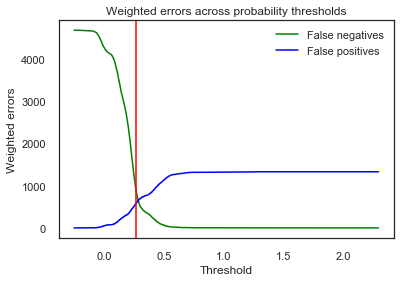

In [51]:
plt.plot(thresholds, FP, color='green', label="False negatives")
plt.plot(thresholds, FN, color='blue', label="False positives")
plt.axvline(x=best_threshold, color='red')
plt.xlabel("Threshold")
plt.ylabel("Weighted errors")
plt.legend()
plt.title("Weighted errors across probability thresholds")
plt.show()

# **PART 7**: LOGIT MODEL
Repeat the analysis using a logit model. You can start with the code below, as it shows you how to setup, fit, and predict with a logit model in sklearn.

In [52]:
# Binary classification using a logit model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_hat_logit = logit_model.predict(X_test)
y_hat_logit_prob = logit_model.predict_proba(X_test)

**PROBLEM**: Calculate the accuracy of the model.

In [53]:
# What is the accuracy of the logit model?
print("accuracy = ", (len(y_test)-sum(abs(y_hat_logit-y_test)))/len(y_test)  )

accuracy =  0.7783333333333333


**PROBLEM**: Plot a confusion matrix.

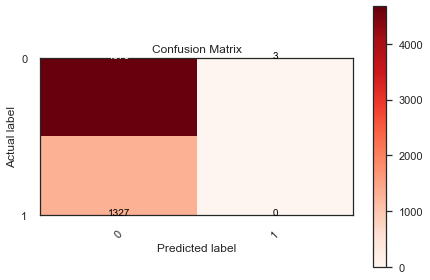

In [54]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_logit)
plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)

**PROBLEM**: How many errors did the model make?

In [55]:
# How many total errors did it make?
print("Number of FP+FN = ", cm[0][1]+cm[1][0])

Number of FP+FN =  1330


**PROBLEM**: Calculate the accuracy.

In [56]:
# Calculate accuracy
print("Accuracy = ", (cm[0][0]+cm[1][1])/len(y_test) )

Accuracy =  0.7783333333333333


**PROBLEM**: Compare the accuracies between the linear probability model with a threshold at 0.6 and the default logit model? Do the results make sense? Why or why not?

ANSWER:
* The accuracies of the linear model with threshold 0.6 and the logit model are almost the same. The linear model is slightly better than the default logit model
* It means that there are no outliers that disturb the linear model's prediction which is sensitive to outliers

**PROBLEM**: Calculate the AUC score. Does it make sense? Why or why not?

In [57]:
# Calculate AUC
roc_auc_score(y_test, y_hat_logit_prob[:,1])

0.6440761603922935

ANSWER:
* The AUC score of the linear model is also better than the one of logit model.
* It means the linear model is a better choice for this dataset.

**PROBLEM**: Finally, plot the ROC curves for BOTH the linear probability model and the logit model in one graph. HINT: Now you cannot use the `plot_roc()` custom function defined above - but you may want to look at it for ideas about what to do.

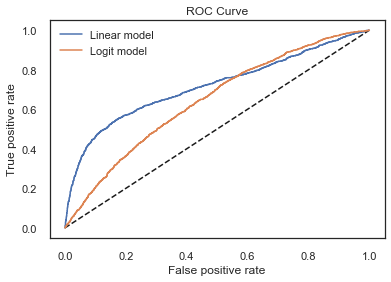

In [58]:
def plot_2roc(fpr1, tpr1, fpr2, tpr2, title='ROC Curve', note=''):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1, tpr1, label="Linear model")
    plt.plot(fpr2, tpr2, label="Logit model")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_hat_ols_prob)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_hat_logit_prob[:,1])
plot_2roc(fpr1, tpr1, fpr2, tpr2)

**PROBLEM**: Under what conditions might you want to use a logit model, even though you got the AUC results that you did?

ANSWER: 
* In case there are outliers or our features are skewed the linear regression uses ordinary least squares method to minimise the errors and it is hence sensitive to outliers, while logistic regression uses maximum likelihood method to arrive at the solution and is less sensitive.